# Data analysis of the category "Laptops" using the MPSTATS service and the Wildberries marketplace

# Content page
1. [Import](#import)
2. [Data](#data) <br>
3. [Data Preprocessing :](#data_prep)
                    <br> - 3.1. [Missing values](#missing_values)
                    <br> - 3.2. [Duplicates](#duplicates)
                    <br> - 3.3. [Data types](#data_types)
                    <br> - 3.4. [Columns](#columns)
                    <br> - 3.5. [Outliers](#outliers)<br>
4. [Data analysis:](#data_analysis)
                    <br> - 4.1. [Sales and Revenue analysis](#sales_analysis)
                    <br> - 4.2. [Price and Discount analysis](#price_analysis)
                    <br> - 4.3. [Brand Revenue analysis](#brand_analysis)
                    <br> - 4.4. [Analysis of Producing Countries](#country_analysis)
                    <br> - 4.5. [Sellers Analysis](#seller_analysis)
                    <br> - 4.6. [Rating and Sales Analysis](#rating_analysis)
                    <br> - 4.6. [Reviews and Sales Analysis](#review_analysis)
5. [Logistic Regression](#log_reg)
6. [Sentimental Analysis](#nlp)

<a id='import'></a>
# Import

In [68]:
# data & vizualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# NLP
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re
import string
from wordcloud import WordCloud

# ML 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split

# Regression
from sklearn.linear_model import LogisticRegression

# Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

<a id='data'></a>
# Dataset

In [22]:
wb = pd.read_csv('laptops.csv', header=1)
wb.head()

–ù–∞–∑–≤–∞–Ω–∏–µ        SKU  \
0          MacBook Pro 16/M1 Pro/16/512 (Space Grey)  226518722   
1               MacBook Air 13/M1/8/256 (Space Grey)  193153888   
2               MacBook Air 13/M1/8/256 (Space Grey)  178245376   
3  –ù–æ—É—Ç–±—É–∫ MagicBook 14 R5 16–ì–ë+512–ì–ë 5301AFWF –ë–µ...  254706293   
4             V15 G3 ABA 15.6"/FHD/Ryzen 7/8/512/DOS  195327183   

        –ü—Ä–æ–¥–∞–≤–µ—Ü   –ë—Ä–µ–Ω–¥ –°—Ç—Ä–∞–Ω–∞  –í—ã—Ä—É—á–∫–∞, ‚ÇΩ  –°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è –≤—ã—Ä—É—á–∫–∞  \
0  –û–û–û –í–ë –†–∏—Ç–µ–π–ª   Apple  –ö–∏—Ç–∞–π    13710414            457013.800000   
1  –û–û–û –í–ë –†–∏—Ç–µ–π–ª   Apple  –ö–∏—Ç–∞–π       74283              2476.100000   
2  –û–û–û –í–ë –†–∏—Ç–µ–π–ª   Apple  –ö–∏—Ç–∞–π     2633467             87782.233333   
3     –¢–≤–æ–π –í—ã–±–æ—Ä   Honor  –ö–∏—Ç–∞–π      527651             17588.366667   
4  –û–û–û –í–ë –†–∏—Ç–µ–π–ª  lenovo  –ö–∏—Ç–∞–π       49589              1652.966667   

   –ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ  –ù–∞–ª–∏—á–∏–µ  –û–±–æ—Ä–∞—á–∏–≤–∞–µ–º–æ—Å—Ç—å  –ó–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫, %  \
0               98      575           176.02                    74.43   
1                1      567         17010.00                    99.82   
2               37      496           402.16                    88.71   
3               13      233           412.23                    89.27   
4                1      191          5730.00                    99.48   

                           –ì—Ä–∞—Ñ–∏–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∫–ª–∞–¥–æ–≤  –ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞  –°–∫–∏–¥–∫–∞  \
0  0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...        189990      27   
1  0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...        114990      35   
2  0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...        114990      33   
3  0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...         59990      34   
4  0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,...         72990      30   

   –¶–µ–Ω–∞ —Å–æ —Å–∫–∏–¥–∫–æ–π                              –ì—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ü–µ–Ω—ã  \
0           137248  142112,142112,142112,142112,142112,142112,1421...   
1            74168  75260,75260,74283,74283,74283,74283,74283,7428...   
2            76146  69396,69396,69396,69396,69396,69396,69396,6939...   
3            39143  0,0,0,0,0,0,0,41231,41231,41231,41231,41231,41...   
4            50801  50844,50844,50844,50844,50844,50844,50844,5084...   

   –î—Ä–æ–±–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥  –û—Ç–∑—ã–≤—ã  –î–Ω–µ–π –Ω–∞ –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–µ  –°—Ä–µ–¥–Ω—è—è —Ä–µ–∫–ª–∞–º–Ω–∞—è —Å—Ç–∞–≤–∫–∞  
0              4.5      41                   109                         0  
1              4.9     179                   292                         0  
2              4.9     179                   359                         0  
3              0.0       0                    24                         0  
4              4.8      17                   257                         0

In [23]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   –ù–∞–∑–≤–∞–Ω–∏–µ                   100 non-null    object 
 1   SKU                        100 non-null    int64  
 2   –ü—Ä–æ–¥–∞–≤–µ—Ü                   100 non-null    object 
 3   –ë—Ä–µ–Ω–¥                      99 non-null     object 
 4   –°—Ç—Ä–∞–Ω–∞                     68 non-null     object 
 5   –í—ã—Ä—É—á–∫–∞, ‚ÇΩ                 100 non-null    int64  
 6   –°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è –≤—ã—Ä—É—á–∫–∞    100 non-null    float64
 7   –ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ            100 non-null    int64  
 8   –ù–∞–ª–∏—á–∏–µ                    100 non-null    int64  
 9   –û–±–æ—Ä–∞—á–∏–≤–∞–µ–º–æ—Å—Ç—å            100 non-null    float64
 10  –ó–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫, %    100 non-null    float64
 11  –ì—Ä–∞—Ñ–∏–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∫–ª–∞–¥–æ–≤  100

In [24]:
print(wb.describe())

                SKU    –í—ã—Ä—É—á–∫–∞, ‚ÇΩ  –°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è –≤—ã—Ä—É—á–∫–∞  –ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ  \
count  1.000000e+02  1.000000e+02               100.000000       100.000000   
mean   2.149926e+08  9.535549e+05             31785.163667        30.170000   
std    3.833991e+07  2.321189e+06             77372.963849        73.808523   
min    8.440413e+07  0.000000e+00                 0.000000         0.000000   
25%    1.782462e+08  3.154250e+04              1051.416667         1.000000   
50%    2.255149e+08  1.556350e+05              5187.833333         3.000000   
75%    2.478799e+08  5.476055e+05             18253.516667        14.000000   
max    2.619695e+08  1.422724e+07            474241.233333       496.000000   

          –ù–∞–ª–∏—á–∏–µ  –û–±–æ—Ä–∞—á–∏–≤–∞–µ–º–æ—Å—Ç—å  –ó–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫, %  –ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞  \
count  100.000000       100.000000               100.000000     100.00000   
mean    82.480000       600.157600      

<a id='data_prep'></a>
# Data Preprocessing:
                                    1. Missing values
                                    2. Duplicates
                                    3. Data types
                                    4. Columns
                                    5. Outliers 

<a id='missing_values'></a>

In [25]:
# Missing values
wb.isnull().sum()

–ù–∞–∑–≤–∞–Ω–∏–µ                      0
SKU                           0
–ü—Ä–æ–¥–∞–≤–µ—Ü                      0
–ë—Ä–µ–Ω–¥                         1
–°—Ç—Ä–∞–Ω–∞                       32
–í—ã—Ä—É—á–∫–∞, ‚ÇΩ                    0
–°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è –≤—ã—Ä—É—á–∫–∞       0
–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ               0
–ù–∞–ª–∏—á–∏–µ                       0
–û–±–æ—Ä–∞—á–∏–≤–∞–µ–º–æ—Å—Ç—å               0
–ó–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫, %       0
–ì—Ä–∞—Ñ–∏–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∫–ª–∞–¥–æ–≤     0
–ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞                  0
–°–∫–∏–¥–∫–∞                        0
–¶–µ–Ω–∞ —Å–æ —Å–∫–∏–¥–∫–æ–π               0
–ì—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ü–µ–Ω—ã         0
–î—Ä–æ–±–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥               0
–û—Ç–∑—ã–≤—ã                        0
–î–Ω–µ–π –Ω–∞ –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–µ          0
–°—Ä–µ–¥–Ω—è—è —Ä–µ–∫–ª–∞–º–Ω–∞—è —Å—Ç–∞–≤–∫–∞      0
dtype: int64

In [26]:
wb.dropna(subset=['–ë—Ä–µ–Ω–¥', '–°—Ç—Ä–∞–Ω–∞'], inplace=True)
print(f"Number of null values after preprocessing: {wb.isnull().sum().sum()}")
print(f"Shape after preprocessing: {wb.shape}")

Number of null values after preprocessing: 0
Shape after preprocessing: (67, 20)


<a id='duplicates'></a>

In [27]:
# Duplicates
duplicates = wb.duplicated().sum()

if duplicates > 0:
    wb = wb.drop_duplicates()

print(f'Number of the same rows (duplicates): {duplicates}')
print(f'Shape of the dataset after removing duplicates: {wb.shape}')

Number of the same rows (duplicates): 0
Shape of the dataset after removing duplicates: (67, 20)


<a id='data_types'></a>

In [28]:
#dtype
print(wb.dtypes)
wb['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'] = wb['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'].astype(float)

–ù–∞–∑–≤–∞–Ω–∏–µ                      object
SKU                            int64
–ü—Ä–æ–¥–∞–≤–µ—Ü                      object
–ë—Ä–µ–Ω–¥                         object
–°—Ç—Ä–∞–Ω–∞                        object
–í—ã—Ä—É—á–∫–∞, ‚ÇΩ                     int64
–°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è –≤—ã—Ä—É—á–∫–∞      float64
–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ                int64
–ù–∞–ª–∏—á–∏–µ                        int64
–û–±–æ—Ä–∞—á–∏–≤–∞–µ–º–æ—Å—Ç—å              float64
–ó–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫, %      float64
–ì—Ä–∞—Ñ–∏–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∫–ª–∞–¥–æ–≤     object
–ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞                   int64
–°–∫–∏–¥–∫–∞                         int64
–¶–µ–Ω–∞ —Å–æ —Å–∫–∏–¥–∫–æ–π                int64
–ì—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ü–µ–Ω—ã         object
–î—Ä–æ–±–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥              float64
–û—Ç–∑—ã–≤—ã                         int64
–î–Ω–µ–π –Ω–∞ –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–µ           int64
–°—Ä–µ–¥–Ω—è—è —Ä–µ–∫–ª–∞–º–Ω–∞—è —Å—Ç–∞–≤–∫–∞       int64
dtype: object


<a id='columns'></a>

In [29]:
#Columns
wb.drop(columns=['–ì—Ä–∞—Ñ–∏–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å–∫–ª–∞–¥–æ–≤', '–ì—Ä–∞—Ñ–∏–∫ –∏–∑–º–µ–Ω–µ–Ω–∏—è —Ü–µ–Ω—ã'], inplace=True)

In [30]:
wb.head()

–ù–∞–∑–≤–∞–Ω–∏–µ        SKU  \
0          MacBook Pro 16/M1 Pro/16/512 (Space Grey)  226518722   
1               MacBook Air 13/M1/8/256 (Space Grey)  193153888   
2               MacBook Air 13/M1/8/256 (Space Grey)  178245376   
3  –ù–æ—É—Ç–±—É–∫ MagicBook 14 R5 16–ì–ë+512–ì–ë 5301AFWF –ë–µ...  254706293   
4             V15 G3 ABA 15.6"/FHD/Ryzen 7/8/512/DOS  195327183   

        –ü—Ä–æ–¥–∞–≤–µ—Ü   –ë—Ä–µ–Ω–¥ –°—Ç—Ä–∞–Ω–∞  –í—ã—Ä—É—á–∫–∞, ‚ÇΩ  –°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è –≤—ã—Ä—É—á–∫–∞  \
0  –û–û–û –í–ë –†–∏—Ç–µ–π–ª   Apple  –ö–∏—Ç–∞–π  13710414.0            457013.800000   
1  –û–û–û –í–ë –†–∏—Ç–µ–π–ª   Apple  –ö–∏—Ç–∞–π     74283.0              2476.100000   
2  –û–û–û –í–ë –†–∏—Ç–µ–π–ª   Apple  –ö–∏—Ç–∞–π   2633467.0             87782.233333   
3     –¢–≤–æ–π –í—ã–±–æ—Ä   Honor  –ö–∏—Ç–∞–π    527651.0             17588.366667   
4  –û–û–û –í–ë –†–∏—Ç–µ–π–ª  lenovo  –ö–∏—Ç–∞–π     49589.0              1652.966667   

   –ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ  –ù–∞–ª–∏—á–∏–µ  –û–±–æ—Ä–∞—á–∏–≤–∞–µ–º–æ—Å—Ç—å  –ó–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫, %  \
0               98      575           176.02                    74.43   
1                1      567         17010.00                    99.82   
2               37      496           402.16                    88.71   
3               13      233           412.23                    89.27   
4                1      191          5730.00                    99.48   

   –ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞  –°–∫–∏–¥–∫–∞  –¶–µ–Ω–∞ —Å–æ —Å–∫–∏–¥–∫–æ–π  –î—Ä–æ–±–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥  –û—Ç–∑—ã–≤—ã  \
0        189990      27           137248              4.5      41   
1        114990      35            74168              4.9     179   
2        114990      33            76146              4.9     179   
3         59990      34            39143              0.0       0   
4         72990      30            50801              4.8      17   

   –î–Ω–µ–π –Ω–∞ –º–∞—Ä–∫–µ—Ç–ø–ª–µ–π—Å–µ  –°—Ä–µ–¥–Ω—è—è —Ä–µ–∫–ª–∞–º–Ω–∞—è —Å—Ç–∞–≤–∫–∞  
0                   109                         0  
1                   292                         0  
2                   359                         0  
3                    24                         0  
4                   257                         0

In [31]:
wb.shape

(67, 18)

<a id='outliers'></a>

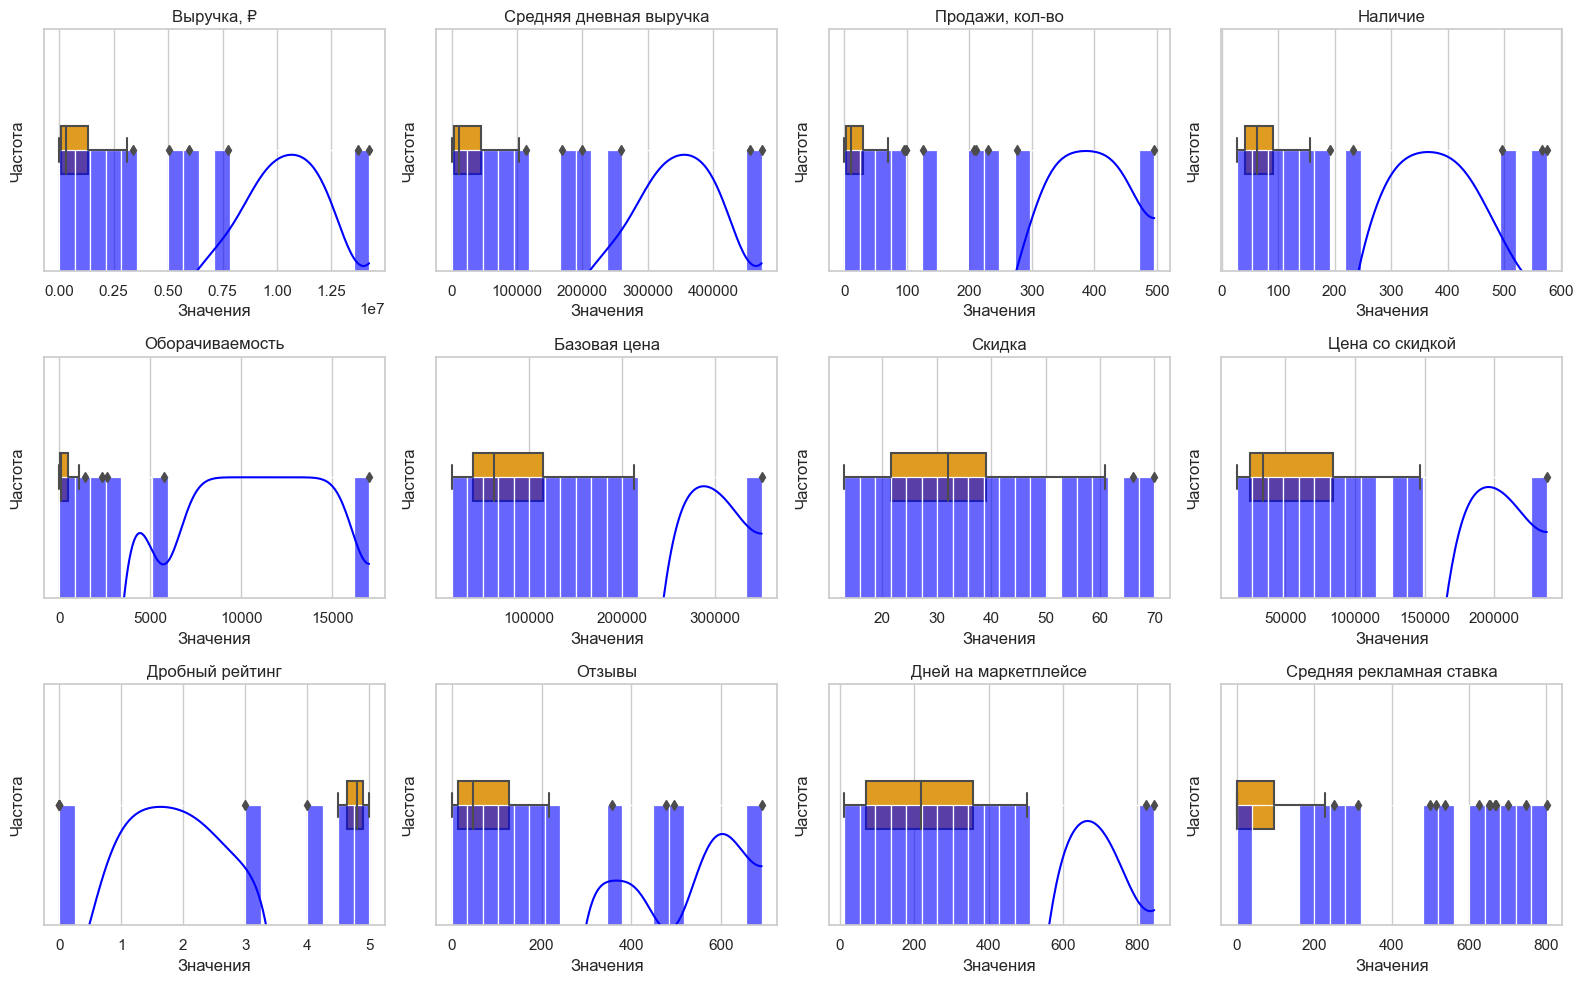

In [32]:
#Outliers
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))

exclude_columns = ['SKU', '–ó–∞–º–æ—Ä–æ–∂–µ–Ω–Ω—ã–π –æ—Å—Ç–∞—Ç–æ–∫, %']

numeric_columns = wb.select_dtypes(include=['float64', 'int64']).columns
filtered_columns = [col for col in numeric_columns if col not in exclude_columns]

n_cols = 4
n_rows = (len(filtered_columns) + n_cols - 1) // n_cols  # –æ–∫—Ä—É–≥–ª—è–µ–º –≤–≤–µ—Ä—Ö

for i, col in enumerate(filtered_columns, start=1):
    plt.subplot(n_rows, n_cols, i)  # —Å–æ–∑–¥–∞–µ–º —Å–µ—Ç–∫—É
    sns.histplot(wb[col], bins=20, kde=True, color='blue', alpha=0.6)  # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ —Å –ø–ª–æ—Ç–Ω–æ—Å—Ç—å—é
    sns.boxplot(x=wb[col], color='orange', width=0.2)  # –ö–æ—Ä–æ–±—á–∞—Ç—ã–π –≥—Ä–∞—Ñ–∏–∫
    plt.title(col)
    plt.xlabel('–ó–Ω–∞—á–µ–Ω–∏—è')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')

plt.tight_layout()
plt.show()

*–û–ë–™–Ø–°–ù–ï–ù–ò–ï –ì–†–ê–§–ò–ö–û–í*

<a id='data_analysis'></a>
After the data is fully processed, the analysis begins

<a id='sales_analysis'></a>
# Sales and Revenue Analysis

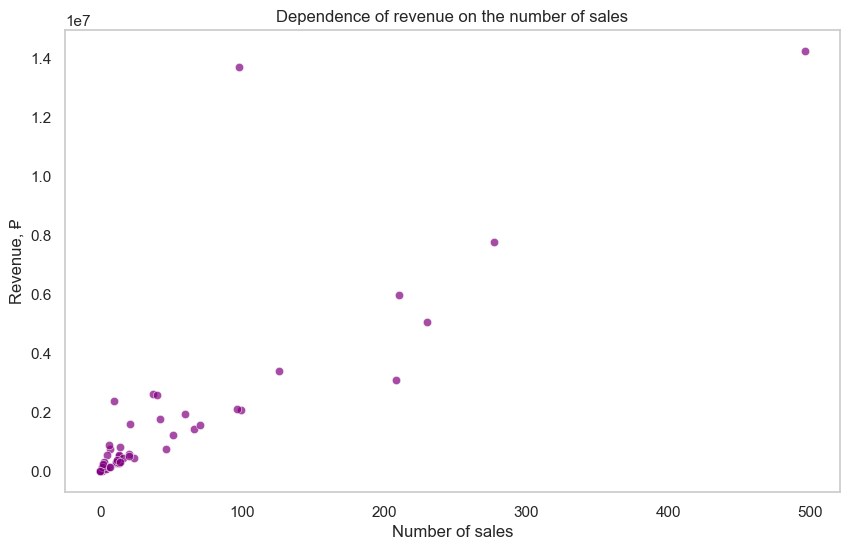

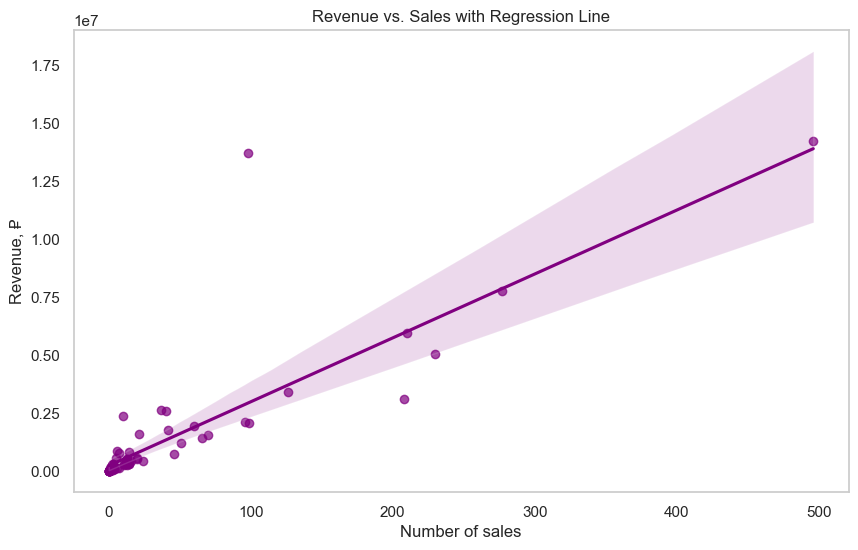

Correlation between sales volume and revenue:
                 –ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ  –í—ã—Ä—É—á–∫–∞, ‚ÇΩ
–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ          1.00000     0.83776
–í—ã—Ä—É—á–∫–∞, ‚ÇΩ               0.83776     1.00000


In [33]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=wb, x='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', y='–í—ã—Ä—É—á–∫–∞, ‚ÇΩ', color='purple', alpha=0.7)
plt.title('Dependence of revenue on the number of sales')
plt.xlabel('Number of sales')
plt.ylabel('Revenue, ‚ÇΩ')
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(data=wb, x='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', y='–í—ã—Ä—É—á–∫–∞, ‚ÇΩ', color='purple', marker='o', scatter_kws={'alpha':0.7})
plt.title('Revenue vs. Sales with Regression Line')
plt.xlabel('Number of sales')
plt.ylabel('Revenue, ‚ÇΩ')
plt.grid()
plt.show()

correlation = wb[['–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', '–í—ã—Ä—É—á–∫–∞, ‚ÇΩ']].corr()
print('Correlation between sales volume and revenue:')
print(correlation)

<a id='price_analysis'></a>
# Price and Discount analysis

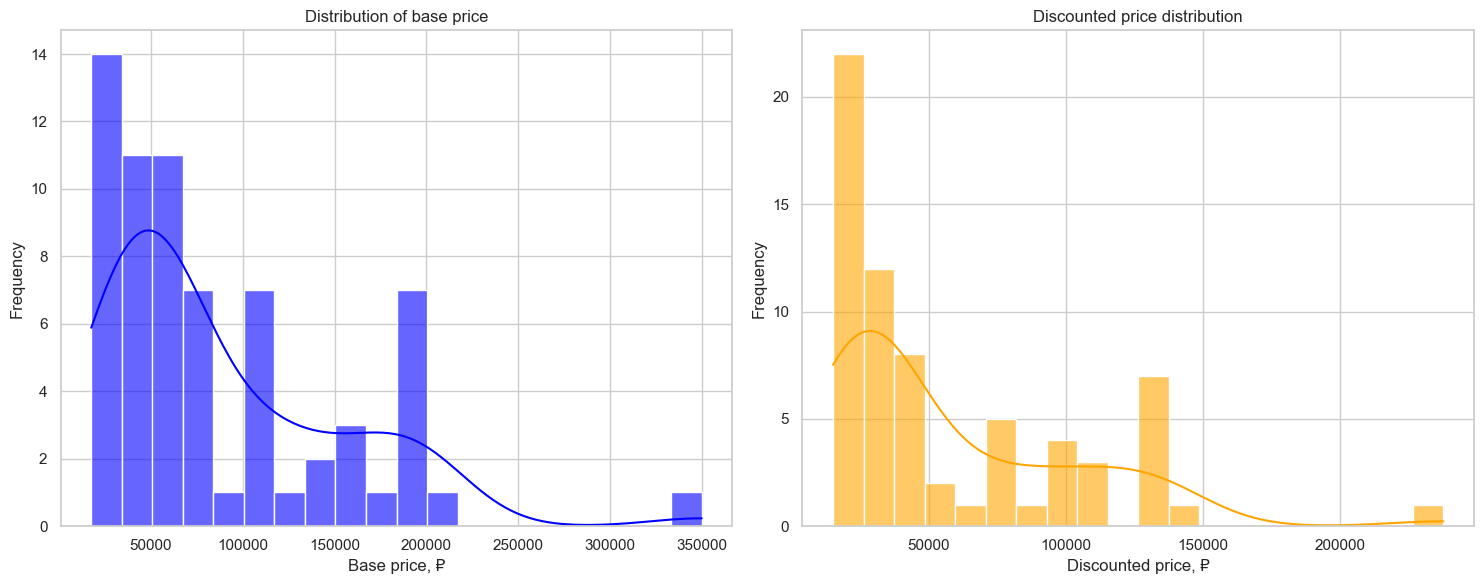

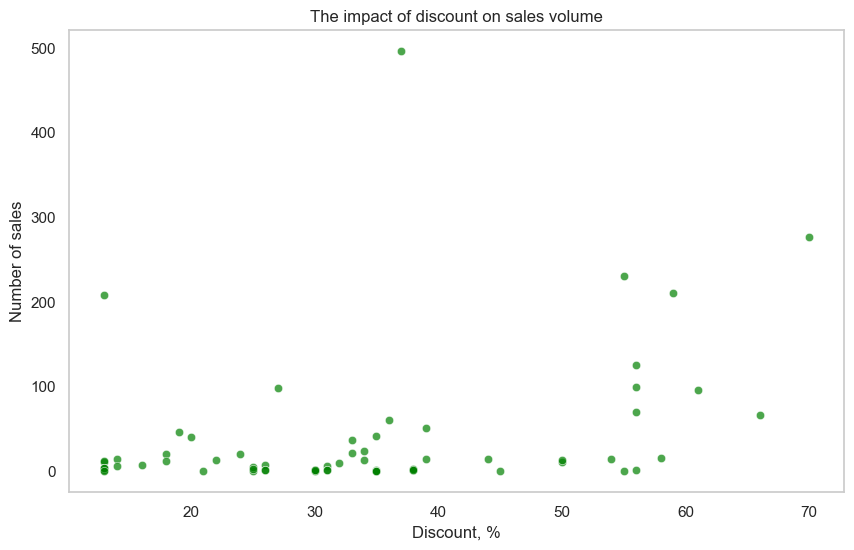

In [34]:
plt.figure(figsize=(15, 6))

# basic
plt.subplot(1, 2, 1)
sns.histplot(wb['–ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞'], bins=20, kde=True, color='blue', alpha=0.6)
plt.title('Distribution of base price')
plt.xlabel('Base price, ‚ÇΩ')
plt.ylabel('Frequency')

# discount
plt.subplot(1, 2, 2)
sns.histplot(wb['–¶–µ–Ω–∞ —Å–æ —Å–∫–∏–¥–∫–æ–π'], bins=20, kde=True, color='orange', alpha=0.6)
plt.title('Discounted price distribution')
plt.xlabel('Discounted price, ‚ÇΩ')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=wb, x='–°–∫–∏–¥–∫–∞', y='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', color='green', alpha=0.7)
plt.title('The impact of discount on sales volume')
plt.xlabel('Discount, %')
plt.ylabel('Number of sales')
plt.grid()
plt.show()

<a id='brand_analysis'></a>
# Brand Revenue analysis

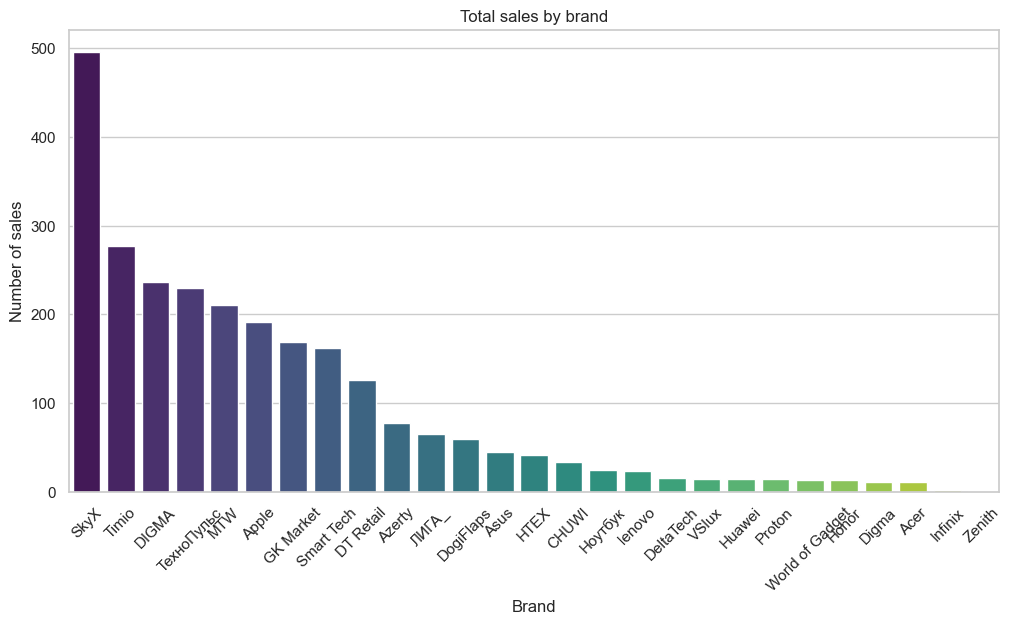

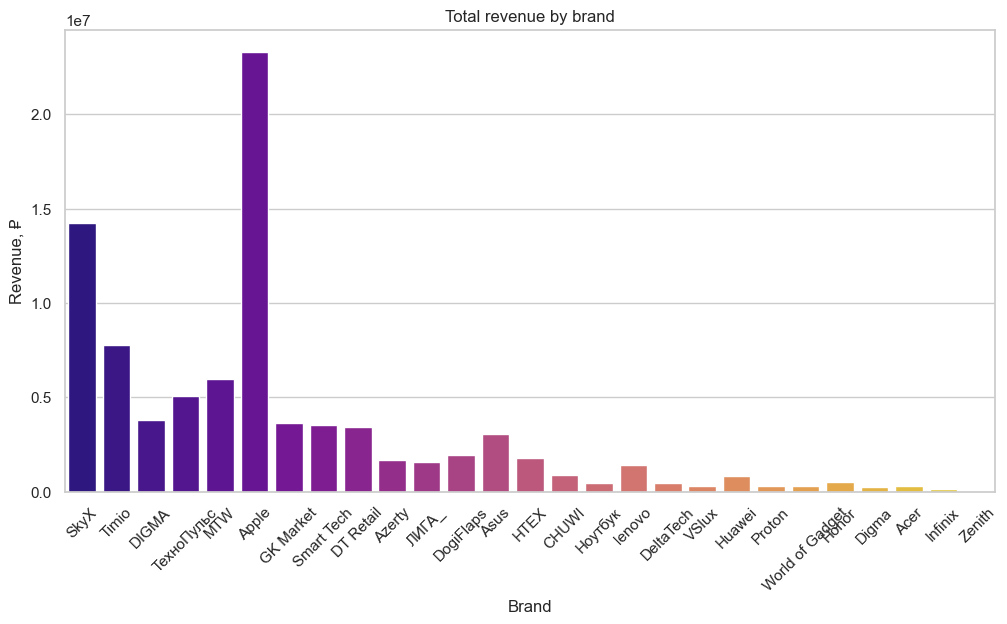

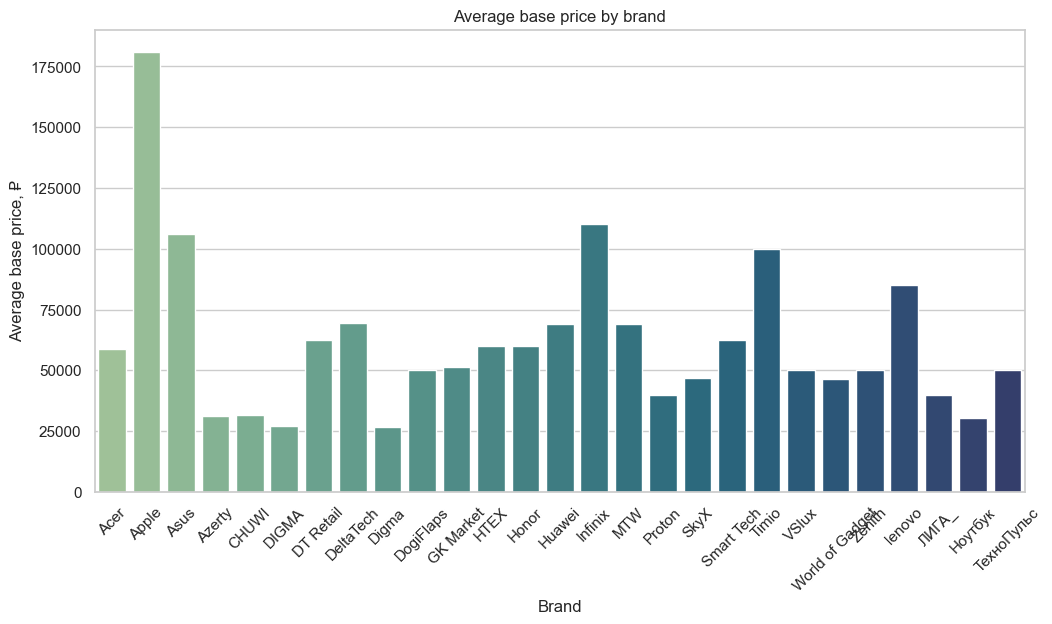

In [35]:
brand_analysis = wb.groupby('–ë—Ä–µ–Ω–¥').agg({'–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ': 'sum', '–í—ã—Ä—É—á–∫–∞, ‚ÇΩ': 'sum'}).reset_index()

brand_analysis = brand_analysis[(brand_analysis['–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ'] > 0) & (brand_analysis['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'] > 0)]

brand_analysis = brand_analysis.sort_values(by='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_analysis, x='–ë—Ä–µ–Ω–¥', y='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', palette='viridis')
plt.title('Total sales by brand')
plt.xlabel('Brand')
plt.ylabel('Number of sales')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=brand_analysis, x='–ë—Ä–µ–Ω–¥', y='–í—ã—Ä—É—á–∫–∞, ‚ÇΩ', palette='plasma')
plt.title('Total revenue by brand')
plt.xlabel('Brand')
plt.ylabel('Revenue, ‚ÇΩ')
plt.xticks(rotation=45)
plt.show()

avg_price_discount = wb.groupby('–ë—Ä–µ–Ω–¥').agg({'–ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞': 'mean', '–°–∫–∏–¥–∫–∞': 'mean'}).reset_index()
avg_price_discount = avg_price_discount[(avg_price_discount['–ë—Ä–µ–Ω–¥'].isin(brand_analysis['–ë—Ä–µ–Ω–¥']))]

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_price_discount, x='–ë—Ä–µ–Ω–¥', y='–ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞', palette='crest')
plt.title('Average base price by brand')
plt.xlabel('Brand')
plt.ylabel('Average base price, ‚ÇΩ')
plt.xticks(rotation=45)
plt.show()

<a id='country_analysis'></a>
# Analysis of Producing Countries (China, Germany, Russia)

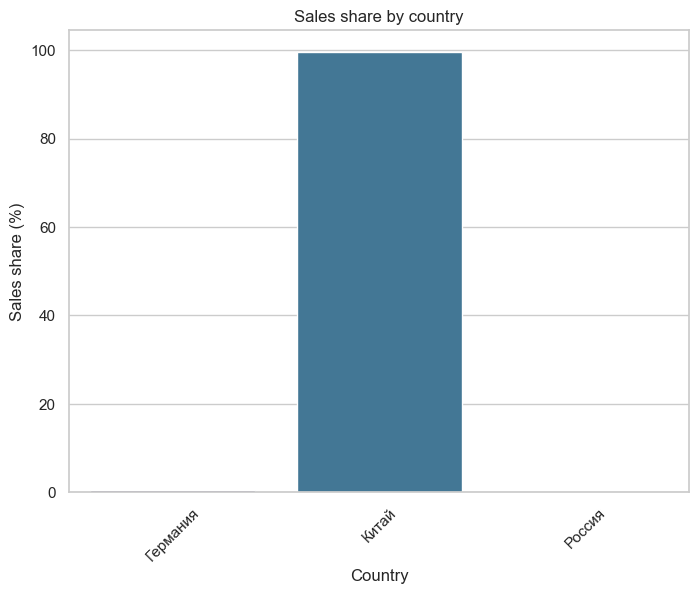

In [36]:
country_analysis = wb.groupby('–°—Ç—Ä–∞–Ω–∞').agg({'–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ': 'sum', '–í—ã—Ä—É—á–∫–∞, ‚ÇΩ': 'sum'}).reset_index()

total_sales = country_analysis['–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ'].sum()
total_revenue = country_analysis['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'].sum()

country_analysis['–î–æ–ª—è –ø—Ä–æ–¥–∞–∂'] = country_analysis['–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ'] / total_sales * 100
country_analysis['–î–æ–ª—è –≤—ã—Ä—É—á–∫–∏'] = country_analysis['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'] / total_revenue * 100

avg_price_discount = wb.groupby('–°—Ç—Ä–∞–Ω–∞').agg({'–ë–∞–∑–æ–≤–∞—è —Ü–µ–Ω–∞': 'mean', '–°–∫–∏–¥–∫–∞': 'mean'}).reset_index()

country_analysis = country_analysis.merge(avg_price_discount, on='–°—Ç—Ä–∞–Ω–∞', how='left')

plt.figure(figsize=(8, 6))
sns.barplot(data=country_analysis, x='–°—Ç—Ä–∞–Ω–∞', y='–î–æ–ª—è –ø—Ä–æ–¥–∞–∂', palette='mako')
plt.title('Sales share by country')
plt.xlabel('Country')
plt.ylabel('Sales share (%)')
plt.xticks(rotation=45)
plt.show()

<a id='seller_analysis'></a>
# Sellers Analysis

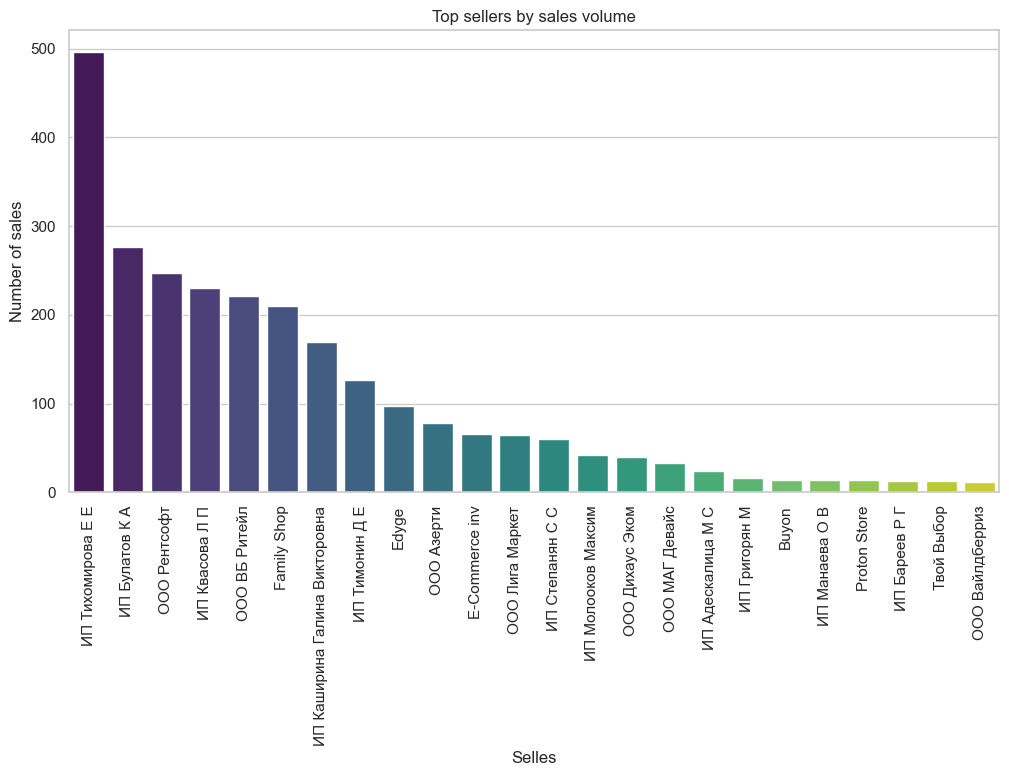

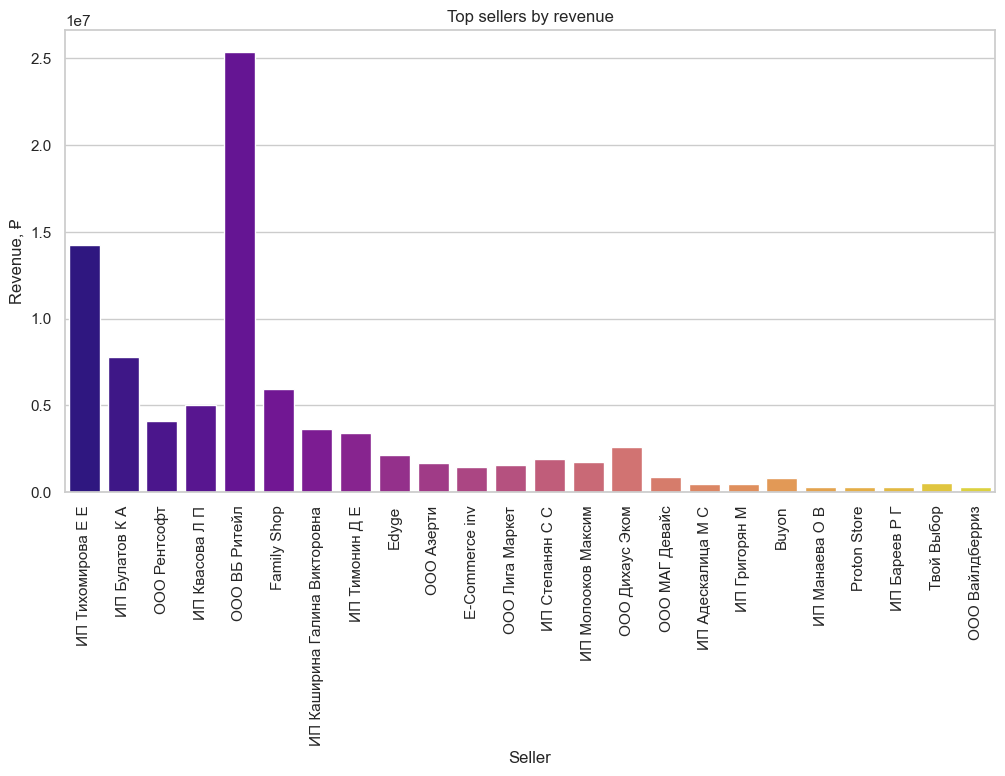

In [37]:
seller_analysis = wb.groupby('–ü—Ä–æ–¥–∞–≤–µ—Ü').agg({'–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ': 'sum', '–í—ã—Ä—É—á–∫–∞, ‚ÇΩ': 'sum'}).reset_index()

seller_analysis = seller_analysis[(seller_analysis['–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ'] > 0) & (seller_analysis['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'] > 0)]

seller_analysis = seller_analysis.sort_values(by='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_analysis, x='–ü—Ä–æ–¥–∞–≤–µ—Ü', y='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', palette='viridis')
plt.title('Top sellers by sales volume')
plt.xlabel('Selles')
plt.ylabel('Number of sales')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=seller_analysis, x='–ü—Ä–æ–¥–∞–≤–µ—Ü', y='–í—ã—Ä—É—á–∫–∞, ‚ÇΩ', palette='plasma')
plt.title('Top sellers by revenu–µ')
plt.xlabel('Seller')
plt.ylabel('Revenue, ‚ÇΩ')
plt.xticks(rotation=90)
plt.show()

<a id='rating_analysis'></a>
# Rating and Sales Analysis

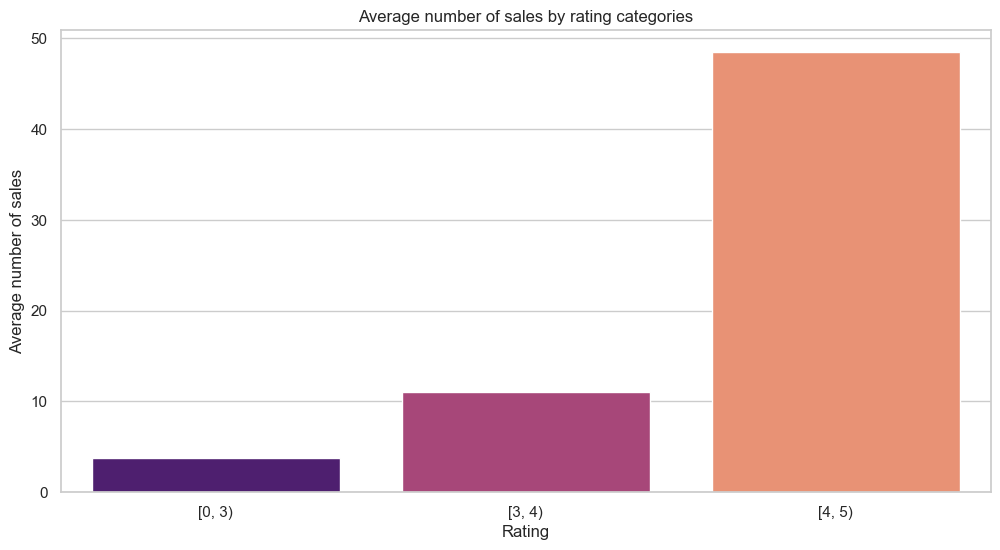

In [38]:
sns.set(style="whitegrid")

rating_analysis = wb.groupby(pd.cut(wb['–î—Ä–æ–±–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥'], bins=[0, 3, 4, 5], right=False)).agg({'–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=rating_analysis, x='–î—Ä–æ–±–Ω—ã–π —Ä–µ–π—Ç–∏–Ω–≥', y='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', palette='magma')
plt.title('Average number of sales by rating categories')
plt.xlabel('Rating')
plt.ylabel('Average number of sales')
plt.xticks(rotation=0)
plt.show()

<a id='review_analysis'></a>
# Reviews and Sales Analysis

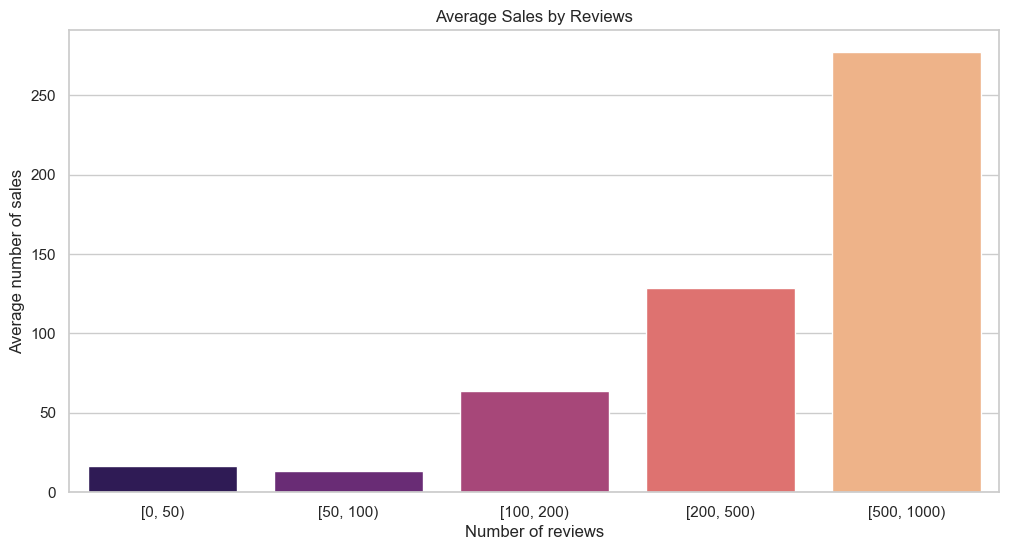

In [39]:
sns.set(style="whitegrid")

review_analysis = wb.groupby(pd.cut(wb['–û—Ç–∑—ã–≤—ã'], bins=[0, 50, 100, 200, 500, 1000], right=False)).agg({'–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=review_analysis, x='–û—Ç–∑—ã–≤—ã', y='–ü—Ä–æ–¥–∞–∂–∏, –∫–æ–ª-–≤–æ', palette='magma')
plt.title('Average Sales by Reviews')
plt.xlabel('Number of reviews')
plt.ylabel('Average number of sales')
plt.xticks(rotation=0)
plt.show()

<a id='log_reg'></a>
# Logistic Regression

In [43]:
average_revenue = wb['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'].mean()
wb['–£—Å–ø–µ—Ö'] = (wb['–í—ã—Ä—É—á–∫–∞, ‚ÇΩ'] > average_revenue).astype(int)

X = wb[['–ù–∞–ª–∏—á–∏–µ', '–°–∫–∏–¥–∫–∞', '–û—Ç–∑—ã–≤—ã', '–°—Ä–µ–¥–Ω—è—è —Ä–µ–∫–ª–∞–º–Ω–∞—è —Å—Ç–∞–≤–∫–∞', '–°—Ä–µ–¥–Ω—è—è –¥–Ω–µ–≤–Ω–∞—è –≤—ã—Ä—É—á–∫–∞']]
y = wb['–£—Å–ø–µ—Ö']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

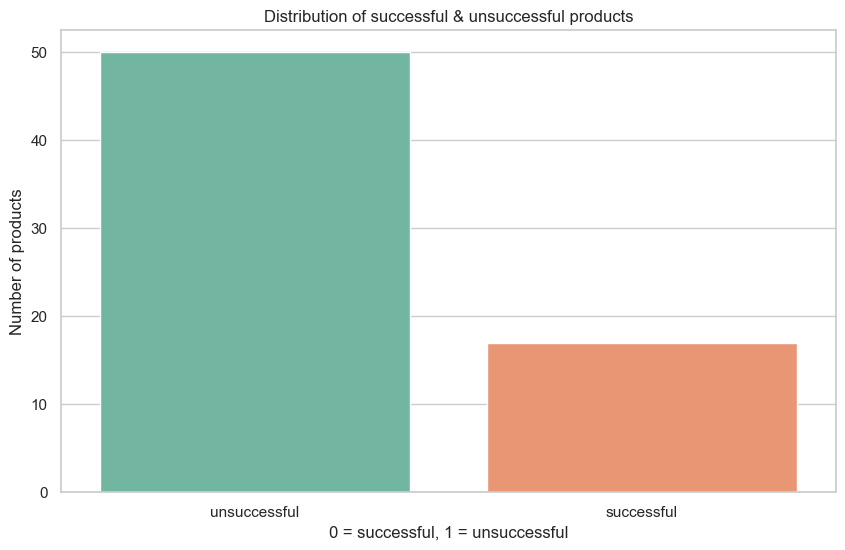

Accuracy: 0.9285714285714286
[[12  0]
 [ 1  1]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.50      0.67         2

    accuracy                           0.93        14
   macro avg       0.96      0.75      0.81        14
weighted avg       0.93      0.93      0.92        14



In [44]:
# Success
plt.figure(figsize=(10, 6))
sns.countplot(data=wb, x='–£—Å–ø–µ—Ö', palette='Set2')
plt.title('Distribution of successful & unsuccessful products')
plt.xlabel('0 = successful, 1 = unsuccessful')
plt.ylabel('Number of products')
plt.xticks(ticks=[0, 1], labels=['unsuccessful', 'successful'])
plt.show()

# Results
print(f'Accuracy: {accuracy}')
print(conf_matrix)
print(class_report)

<a id='nlp'></a>
# Sentimental analysis

In [45]:
NLP_dataset = pd.read_excel('–ê–Ω–∞–ª–∏–∑ –æ—Ç–∑—ã–≤–æ–≤.xlsx')
NLP_dataset.head(20)

status                                               text
0        0  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ö–∞–∫ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ –Ω–∞ —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä, ...
1        1  –í—Å—ë –≤ –ø–æ—Ä—è–¥–∫–µ, –ø—Ä–∏—à—ë–ª –Ω–µ –≤—Å–∫—Ä—ã—Ç—ã–π, –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ...
2        1  –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç, –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫ –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è...
3        1  –í—Å—ë –ø—Ä–∏—à–ª–æ –≤ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫, —É–ø–∞–∫–æ–≤–∫–∞ –∑–∞–≤–æ–¥—Å–∫–∞—è...
4        1                                      –ü—Ä–∏–µ—Ö–∞–ª —Ü–µ–ª—ã–π
5        1                                        –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ
6        0                                       –ë–µ–∑ –≥–∞—Ä–∞–Ω—Ç–∏–∏
7        1  –í—Å—ë –æ—Ç–ª–∏—á–Ω–æ. –û—á–µ–Ω—å –ø–µ—Ä–µ–∂–∏–≤–∞–ª–∞ –∫–æ–Ω–µ—á–Ω–æ. –°—É–º–º–∞ –Ω...
8        1                     –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞, –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π
9        1  –†–µ–±—è—Ç, —ç—Ç–æ –º–∞–∫–±—É–∫, —á—Ç–æ —Ç—É—Ç –µ—â—ë —Å–∫–∞–∑–∞—Ç—å? –ë–∞—Ç–∞—Ä–µ...
10       0                   –®–∏—Ä–æ–∫–∏–µ —Ä–∞–º–∫–∏ —Ü–µ–Ω–∞ –¥—Ä—Ä–æ–≥–∞—è –æ—á–µ–Ω—å
11       1  –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ, —Ç–æ–≤–∞—Ä –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π, –Ω–æ –±—ã–ª–æ —Å—Ç—Ä–∞—à...
12       0  –ë–∞—Ç–∞—Ä–µ—è —Ä–∞–∑—Ä—è–∂–µ–Ω–∞ –≤ –Ω–æ–ª—å, –Ω–µ –∑–∞—Ä—è–∂–∞–µ—Ç—Å—è –≤–æ–æ–±—â–µ...
13       1                         –ë—ã—Å—Ç—Ä–æ –¥–æ—Å—Ç–∞–≤–∏–ª–∏. –û—Ä–∏–≥–∏–Ω–∞–ª
14       1                                         –í—Å–µ —Ö–æ—Ä–æ—à–æ
15       1                          –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ, –≤—Å–µ —Ä–∞–±–æ—Ç–∞–µ—Ç
16       1  –ù—É —á—Ç–æ —Å–∫–∞–∑–∞—Ç—å, –Ω–µ –≤–µ—Ä–∏–ª —á—Ç–æ –±—É–¥–µ—Ç –Ω–æ—Ä–º - –æ–∫–∞–∑...
17       1                                             –°—É–ø–µ—Ä.
18       1  –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ. –†—É—Å—Å–∫–∞—è —Ä–∞—Å–∫–ª–∞–¥–∫–∞ –∏ –µ–≤—Ä–æ–≤–∏–ª–∫–∞ –≤ –∫...
19       1  –î–æ—Å—Ç–∞–≤–∫–∞,–æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–∞—è.–ö–æ–º—É ,–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ,–∫–∞–∫ –∑–∞–ø...

In [46]:
NLP_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   status  99 non-null     int64 
 1   text    99 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [47]:
NLP_dataset.describe()

status
count  99.000000
mean    0.656566
std     0.477272
min     0.000000
25%     0.000000
50%     1.000000
75%     1.000000
max     1.000000

In [48]:
NLP_dataset ['text']

0     –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ö–∞–∫ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ –Ω–∞ —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä, ...
1     –í—Å—ë –≤ –ø–æ—Ä—è–¥–∫–µ, –ø—Ä–∏—à—ë–ª –Ω–µ –≤—Å–∫—Ä—ã—Ç—ã–π, –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ...
2     –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç, –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫ –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è...
3     –í—Å—ë –ø—Ä–∏—à–ª–æ –≤ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫, —É–ø–∞–∫–æ–≤–∫–∞ –∑–∞–≤–æ–¥—Å–∫–∞—è...
4                                         –ü—Ä–∏–µ—Ö–∞–ª —Ü–µ–ª—ã–π
                            ...                        
94    –ö—É–ø–∏–ª –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–µ—Å—è—Ü–µ–≤ –Ω–∞–∑–∞–¥. –û—á–µ–Ω—å –¥–æ–≤–æ–ª–µ–Ω. ...
95                  –ü—Ä–∏—à–µ–ª —Ü–µ–ª—ã–π, —Ä–∞–±–æ—Ç–∞–µ—Ç –≤—Å—ë –æ—Ç–ª–∏—á–Ω–æ!
96    –ö—É–ø–∏–ª–∏ –Ω–æ—É—Ç–±—É–∫ –¥–ª—è —É—á–µ–±—ã —Ä–µ–±–µ–Ω–∫—É, —Ç–æ–≤–∞—Ä —Å–æ–æ—Ç–≤–µ...
97    –ü—Ä–∏—à–ª–∞ –≤ —Å—Ä–æ–∫,–Ω–æ—É—Ç —Ö–æ—Ä–æ—à —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ ,–≤...
98    –¢–æ–ø –∑–∞ —Å–≤–æ–∏ –¥–µ–Ω—å–≥–∏, —É–∂–µ –∏—Å–ø–æ–ª—å–∑—É—é 4 –º–µ—Å—è—Ü–∞ –∏ –Ω...
Name: text, Length: 99, dtype: object

# Length column

In [49]:
NLP_dataset['length'] = NLP_dataset['text'].apply(len)
NLP_dataset.head(20)

status                                               text  length
0        0  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –ö–∞–∫ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ –Ω–∞ —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä, ...     178
1        1  –í—Å—ë –≤ –ø–æ—Ä—è–¥–∫–µ, –ø—Ä–∏—à—ë–ª –Ω–µ –≤—Å–∫—Ä—ã—Ç—ã–π, –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ...      52
2        1  –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç, –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫ –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è...     636
3        1  –í—Å—ë –ø—Ä–∏—à–ª–æ –≤ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫, —É–ø–∞–∫–æ–≤–∫–∞ –∑–∞–≤–æ–¥—Å–∫–∞—è...      76
4        1                                      –ü—Ä–∏–µ—Ö–∞–ª —Ü–µ–ª—ã–π      13
5        1                                        –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ      11
6        0                                       –ë–µ–∑ –≥–∞—Ä–∞–Ω—Ç–∏–∏      12
7        1  –í—Å—ë –æ—Ç–ª–∏—á–Ω–æ. –û—á–µ–Ω—å –ø–µ—Ä–µ–∂–∏–≤–∞–ª–∞ –∫–æ–Ω–µ—á–Ω–æ. –°—É–º–º–∞ –Ω...     121
8        1                     –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞, –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π      30
9        1  –†–µ–±—è—Ç, —ç—Ç–æ –º–∞–∫–±—É–∫, —á—Ç–æ —Ç—É—Ç –µ—â—ë —Å–∫–∞–∑–∞—Ç—å? –ë–∞—Ç–∞—Ä–µ...    1560
10       0                   –®–∏—Ä–æ–∫–∏–µ —Ä–∞–º–∫–∏ —Ü–µ–Ω–∞ –¥—Ä—Ä–æ–≥–∞—è –æ—á–µ–Ω—å      32
11       1  –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ, —Ç–æ–≤–∞—Ä –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π, –Ω–æ –±—ã–ª–æ —Å—Ç—Ä–∞—à...     104
12       0  –ë–∞—Ç–∞—Ä–µ—è —Ä–∞–∑—Ä—è–∂–µ–Ω–∞ –≤ –Ω–æ–ª—å, –Ω–µ –∑–∞—Ä—è–∂–∞–µ—Ç—Å—è –≤–æ–æ–±—â–µ...     152
13       1                         –ë—ã—Å—Ç—Ä–æ –¥–æ—Å—Ç–∞–≤–∏–ª–∏. –û—Ä–∏–≥–∏–Ω–∞–ª      26
14       1                                         –í—Å–µ —Ö–æ—Ä–æ—à–æ      10
15       1                          –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ, –≤—Å–µ —Ä–∞–±–æ—Ç–∞–µ—Ç      25
16       1  –ù—É —á—Ç–æ —Å–∫–∞–∑–∞—Ç—å, –Ω–µ –≤–µ—Ä–∏–ª —á—Ç–æ –±—É–¥–µ—Ç –Ω–æ—Ä–º - –æ–∫–∞–∑...     350
17       1                                             –°—É–ø–µ—Ä.       6
18       1  –í—Å–µ –æ—Ç–ª–∏—á–Ω–æ. –†—É—Å—Å–∫–∞—è —Ä–∞—Å–∫–ª–∞–¥–∫–∞ –∏ –µ–≤—Ä–æ–≤–∏–ª–∫–∞ –≤ –∫...      55
19       1  –î–æ—Å—Ç–∞–≤–∫–∞,–æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–∞—è.–ö–æ–º—É ,–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ,–∫–∞–∫ –∑–∞–ø...     125

In [50]:
NLP_dataset.describe()

status       length
count  99.000000    99.000000
mean    0.656566    96.424242
std     0.477272   193.356185
min     0.000000     6.000000
25%     0.000000    20.500000
50%     1.000000    31.000000
75%     1.000000   101.500000
max     1.000000  1560.000000

In [51]:
positive = NLP_dataset[NLP_dataset['status']==1]
negative = NLP_dataset[NLP_dataset['status']==0]

In [52]:
positive.describe()

status       length
count    65.0    65.000000
mean      1.0    98.769231
std       0.0   210.252138
min       1.0     6.000000
25%       1.0    20.000000
50%       1.0    40.000000
75%       1.0    99.000000
max       1.0  1560.000000

In [53]:
negative.describe()

status      length
count    34.0   34.000000
mean      0.0   91.941176
std       0.0  158.942136
min       0.0   11.000000
25%       0.0   21.250000
50%       0.0   26.500000
75%       0.0  109.750000
max       0.0  846.000000

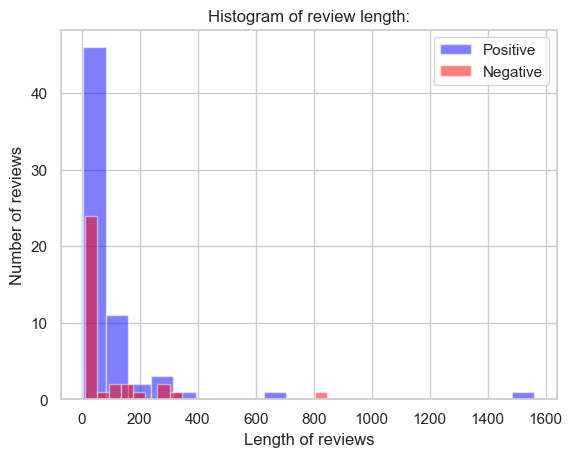

In [54]:
plt.hist(positive['length'], bins=20, color='blue', alpha=0.5, label='Positive')
plt.hist(negative['length'], bins=20, color='red', alpha=0.5, label='Negative')

plt.xlabel('Length of reviews')
plt.ylabel('Number of reviews')
plt.title('Histogram of review length:')
plt.legend(loc='upper right')
plt.show()

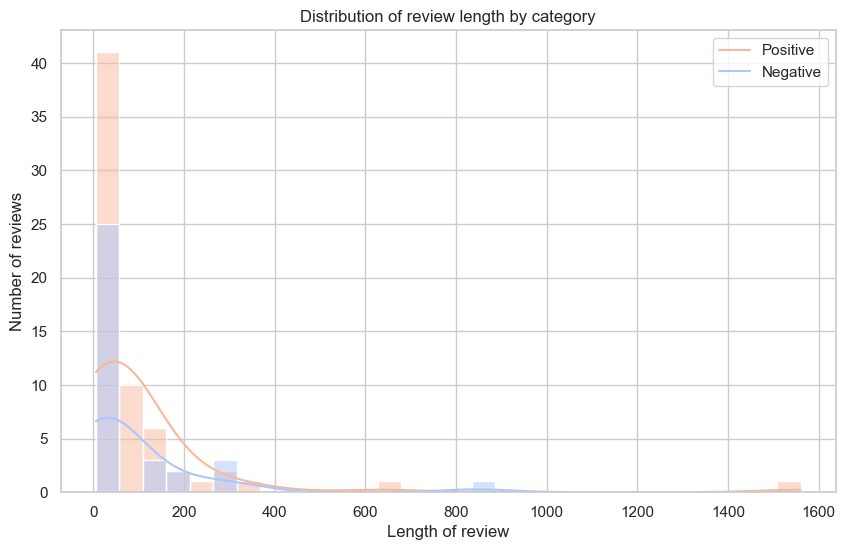

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(data=NLP_dataset, x='length', hue='status', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of review length by category')
plt.xlabel('Length of review')
plt.ylabel('Number of reviews')
plt.legend(labels=['Positive', 'Negative'])
plt.show()

# Text Filtration

In [56]:
NLP_dataset['text'] = NLP_dataset['text'].apply(lambda x: x.lower())
NLP_dataset.head()

status                                               text  length
0       0  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –∫–∞–∫ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ –Ω–∞ —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä, ...     178
1       1  –≤—Å—ë –≤ –ø–æ—Ä—è–¥–∫–µ, –ø—Ä–∏—à—ë–ª –Ω–µ –≤—Å–∫—Ä—ã—Ç—ã–π, –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ...      52
2       1  –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç, –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫ –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è...     636
3       1  –≤—Å—ë –ø—Ä–∏—à–ª–æ –≤ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫, —É–ø–∞–∫–æ–≤–∫–∞ –∑–∞–≤–æ–¥—Å–∫–∞—è...      76
4       1                                      –ø—Ä–∏–µ—Ö–∞–ª —Ü–µ–ª—ã–π      13

In [57]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
NLP_dataset['text'] = NLP_dataset['text'].apply(lambda x: x.translate(remove_punct_dict))
NLP_dataset.head()

status                                               text  length
0       0  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –∫–∞–∫ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ –Ω–∞ —ç—Ç–æ—Ç —Ç–æ–≤–∞—Ä –ø–æ...     178
1       1  –≤—Å—ë –≤ –ø–æ—Ä—è–¥–∫–µ –ø—Ä–∏—à—ë–ª –Ω–µ –≤—Å–∫—Ä—ã—Ç—ã–π –Ω–µ –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞...      52
2       1  –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫ –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è ...     636
3       1  –≤—Å—ë –ø—Ä–∏—à–ª–æ –≤ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫ —É–ø–∞–∫–æ–≤–∫–∞ –∑–∞–≤–æ–¥—Å–∫–∞—è ...      76
4       1                                      –ø—Ä–∏–µ—Ö–∞–ª —Ü–µ–ª—ã–π      13

In [58]:
nltk.download('stopwords')

stop_words_en = set(stopwords.words('english'))
stop_words_ru = set(stopwords.words('russian'))
stop_words_kk = set(stopwords.words('kazakh'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words_en and 
                                                  word.lower() not in stop_words_ru and
                                                  word.lower() not in stop_words_kk]
    return ' '.join(filtered_words)

NLP_dataset['text'] = NLP_dataset['text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
NLP_dataset.head()

status                                               text  length
0       0  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ —Ç–æ–≤–∞—Ä –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—â–∏–π...     178
1       1         –≤—Å—ë –ø–æ—Ä—è–¥–∫–µ –ø—Ä–∏—à—ë–ª –≤—Å–∫—Ä—ã—Ç—ã–π –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–π      52
2       1  –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è —á–∏...     636
3       1  –≤—Å—ë –ø—Ä–∏—à–ª–æ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫ —É–ø–∞–∫–æ–≤–∫–∞ –∑–∞–≤–æ–¥—Å–∫–∞—è –ø—Ä...      76
4       1                                      –ø—Ä–∏–µ—Ö–∞–ª —Ü–µ–ª—ã–π      13

In [60]:
filtered_text = NLP_dataset['text'].tolist()
print(filtered_text)

['–∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ —Ç–æ–≤–∞—Ä –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—â–∏–π –∫—É–ø–∏–ª makbook 16 —á—Ç–æ—Ç–æ –¥—Ä—É–≥–æ–µ –≤—Ç–æ—Ä–æ–π –≤–æ–ø—Ä–æ—Å –ø–æ—á–µ–º—É –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç —Å–µ—Ä–∏–π–Ω—ã–π –Ω–æ–º–µ—Ä –Ω–∏–∂–Ω–µ–π –ø–∞–Ω–µ–ª–∏ mak', '–≤—Å—ë –ø–æ—Ä—è–¥–∫–µ –ø—Ä–∏—à—ë–ª –≤—Å–∫—Ä—ã—Ç—ã–π –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–π', '–ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è —á–∏—Å—Ç–æ–π –ø–µ—Ä–µ—É—Å—Ç–∞–Ω–æ–≤–∫–∏ –æ–∫ –≤—ã–ª–µ–∑–ª–æ –æ—Ç–∫—É–¥–∞—Ç–æ —Å–∫–æ–ª –∫—Ä–∞—Å–∫–∏ –∫–Ω–æ–ø–∫–µ —Ç –≤–∏–¥–µ–æ —Ä–∞—Å–ø–∞–∫–æ–≤–∫–∏ –ø—Ä–∏–ª–∞–≥–∞—é –ø—É–Ω—Ç–∫–µ –≤—ã–¥–∞—á–∏ —Ç–∞–∫—É—é –º–µ–ª–æ—á—å –∑–∞–º–µ—Ç–∏—Ç—å –æ–∂–∏–¥–∞–µ—à—å —Ç–∞–∫–æ–≥–æ –æ—Ç–∫—Ä—ã—Ç–æ–≥–æ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞ –≥–∞—Ä–∞–Ω—Ç–∏—è —Å–∞–π—Ç–µ —ç–ø–ª –≥–æ—Ä—è—á–µ–π –ª–∏–Ω–∏–∏ –ø—Ä–æ–¥–ª–µ–≤–∞–µ—Ç—Å—è –¥–∞—Ç—É –ø–æ–∫—É–ø–∫–∏ –ø–æ–¥—Ç–≤—Ä–µ–∂–¥–∞—é—Ç —Ö–æ—Ç—è —á–µ–∫ –ø—Ä–∏–ª–æ–∂–∏–ª —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ –≥–∞—Ä–∞–Ω—Ç–∏–∏ –Ω–∏–∫–∞–∫–æ–π —Ç–∫ –ø—Ä–æ–¥–∞–≤–µ—Ü —Ç–æ—á–Ω–æ —Ä–µ—à–∞—Ç

In [61]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # —ç–º–æ–¥–∑–∏ —Å–º–∞–π–ª–∏–∫–æ–≤
                               u"\U0001F300-\U0001F5FF"  # —Å–∏–º–≤–æ–ª—ã –∏ –ø–∏–∫—Ç–æ–≥—Ä–∞–º–º—ã
                               u"\U0001F680-\U0001F6FF"  # —Å–∏–º–≤–æ–ª—ã —Ç—Ä–∞–Ω—Å–ø–æ—Ä—Ç–∞ –∏ –∫–∞—Ä—Ç—ã
                               u"\U0001F1E0-\U0001F1FF"  # —Ñ–ª–∞–≥–∏ (iOS)
                               "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)
NLP_dataset['text'] = NLP_dataset['text'].apply(remove_emoji)

# Updated

In [62]:
NLP_dataset.head(20)

status                                               text  length
0        0  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –ø–æ–ª—É—á–∏—Ç—å —á–µ–∫ —Ç–æ–≤–∞—Ä –ø–æ–¥—Ç–≤–µ—Ä–∂–¥–∞—é—â–∏–π...     178
1        1         –≤—Å—ë –ø–æ—Ä—è–¥–∫–µ –ø—Ä–∏—à—ë–ª –≤—Å–∫—Ä—ã—Ç—ã–π –∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–π      52
2        1  –ø–æ–∫–∞ —Ä–∞–±–æ—Ç–∞–µ—Ç –Ω–µ–ø—Ä–∏–≤—è–∑–∞–Ω–Ω–∞—è –∫–æ–º–ø–∞–Ω–∏–∏ –≤–µ—Ä—Å–∏—è —á–∏...     636
3        1  –≤—Å—ë –ø—Ä–∏—à–ª–æ –∫–æ—Ä–æ—Ç–∫–∏–π —Å—Ä–æ–∫ —É–ø–∞–∫–æ–≤–∫–∞ –∑–∞–≤–æ–¥—Å–∫–∞—è –ø—Ä...      76
4        1                                      –ø—Ä–∏–µ—Ö–∞–ª —Ü–µ–ª—ã–π      13
5        1                                            –æ—Ç–ª–∏—á–Ω–æ      11
6        0                                           –≥–∞—Ä–∞–Ω—Ç–∏–∏      12
7        1  –≤—Å—ë –æ—Ç–ª–∏—á–Ω–æ –æ—á–µ–Ω—å –ø–µ—Ä–µ–∂–∏–≤–∞–ª–∞ —Å—É–º–º–∞ –º–∞–ª–µ–Ω—å–∫–∞—è —É...     121
8        1                      –±—ã—Å—Ç—Ä–∞—è –¥–æ—Å—Ç–∞–≤–∫–∞ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π      30
9        1  —Ä–µ–±—è—Ç —ç—Ç–æ –º–∞–∫–±—É–∫ –µ—â—ë —Å–∫–∞–∑–∞—Ç—å –±–∞—Ç–∞—Ä–µ—è —Ç–æ–ø 14 —á–∞...    1560
10       0                   —à–∏—Ä–æ–∫–∏–µ —Ä–∞–º–∫–∏ —Ü–µ–Ω–∞ –¥—Ä—Ä–æ–≥–∞—è –æ—á–µ–Ω—å      32
11       1  –æ—Ç–ª–∏—á–Ω–æ —Ç–æ–≤–∞—Ä –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω—ã–π —Å—Ç—Ä–∞—à–Ω–æ —Ç–æ–≤–∞—Ä –ø—Ä–∏—à–µ...     104
12       0  –±–∞—Ç–∞—Ä–µ—è —Ä–∞–∑—Ä—è–∂–µ–Ω–∞ –Ω–æ–ª—å –∑–∞—Ä—è–∂–∞–µ—Ç—Å—è –≤–æ–æ–±—â–µ–ø–∏—à–µ—Ç ...     152
13       1                          –±—ã—Å—Ç—Ä–æ –¥–æ—Å—Ç–∞–≤–∏–ª–∏ –æ—Ä–∏–≥–∏–Ω–∞–ª      26
14       1                                                         10
15       1                                   –æ—Ç–ª–∏—á–Ω–æ —Ä–∞–±–æ—Ç–∞–µ—Ç      25
16       1  —Å–∫–∞–∑–∞—Ç—å –≤–µ—Ä–∏–ª –Ω–æ—Ä–º –æ–∫–∞–∑–∞–ª–æ—Å—å –Ω–æ—Ä–º –µ–¥–∏–Ω–æ–π –ø—Ä–æ–±–ª...     350
17       1                                              —Å—É–ø–µ—Ä       6
18       1      –æ—Ç–ª–∏—á–Ω–æ —Ä—É—Å—Å–∫–∞—è —Ä–∞—Å–∫–ª–∞–¥–∫–∞ –µ–≤—Ä–æ–≤–∏–ª–∫–∞ –∫–æ–º–ø–ª–µ–∫—Ç–µ      55
19       1  –¥–æ—Å—Ç–∞–≤–∫–∞–æ—á–µ–Ω—å –±—ã—Å—Ç—Ä–∞—è–∫–æ–º—É –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ–∫–∞–∫ –∑–∞–ø–µ—á–∞—Ç...     125

# Word Cloud 

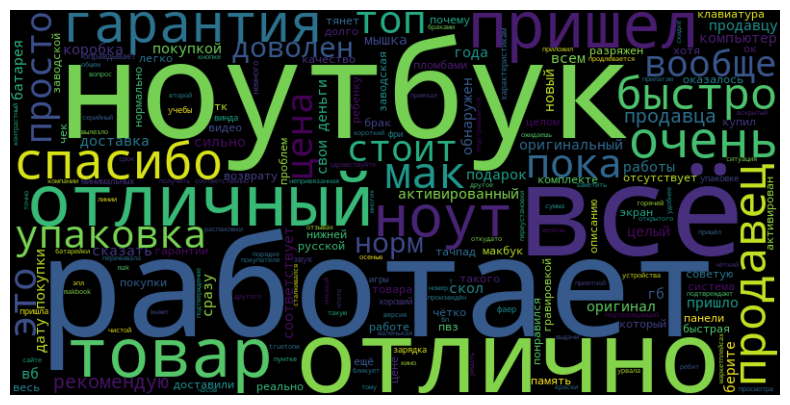

In [63]:
all_text = ' '.join(NLP_dataset['text'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# for Positive Reviews:

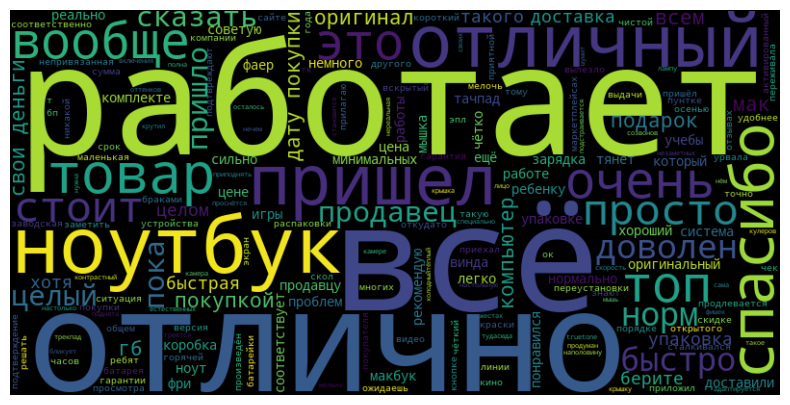

In [64]:
positive_reviews = NLP_dataset[NLP_dataset['status'] == 1]['text']
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='black').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

In [65]:
wordcloud = WordCloud()
wordcloud.generate(positive_text)
positive_word_list = list(wordcloud.words_.keys())
print("–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ —Å–ª–æ–≤–∞:")
print(positive_word_list[:25])

–ü–æ–∑–∏—Ç–∏–≤–Ω—ã–µ —Å–ª–æ–≤–∞:
['—Ä–∞–±–æ—Ç–∞–µ—Ç', '–≤—Å—ë', '–æ—Ç–ª–∏—á–Ω–æ', '–Ω–æ—É—Ç–±—É–∫', '–æ—Ç–ª–∏—á–Ω—ã–π', '–ø—Ä–∏—à–µ–ª', '—Å–ø–∞—Å–∏–±–æ', '—Ç–æ–≤–∞—Ä', '–æ—á–µ–Ω—å', '—ç—Ç–æ', '—Ç–æ–ø', '–≤–æ–æ–±—â–µ', '–ø—Ä–æ—Å—Ç–æ', '—Å—Ç–æ–∏—Ç', '–¥–æ–≤–æ–ª–µ–Ω', '–±—ã—Å—Ç—Ä–æ', '–Ω–æ—Ä–º', '–ø–æ–∫–∞', '–ø—Ä–æ–¥–∞–≤–µ—Ü', '–ø—Ä–∏—à–ª–æ', '—Ü–µ–ª—ã–π', '—Å–∫–∞–∑–∞—Ç—å', '–ø–æ–∫—É–ø–∫–æ–π', '–≤—Å–µ–º', '–æ—Ä–∏–≥–∏–Ω–∞–ª']


# for Negative Reviews:

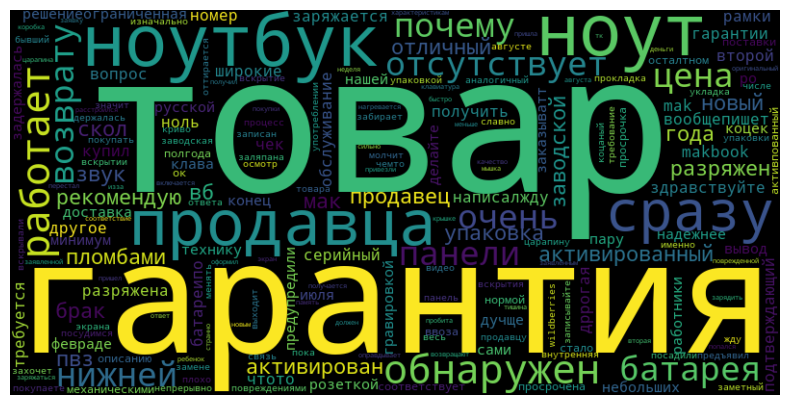

In [66]:
negative_reviews = NLP_dataset[NLP_dataset['status'] == 0]['text']
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

In [67]:
wordcloud = WordCloud()
wordcloud.generate(negative_text)
negative_word_list = list(wordcloud.words_.keys())

print("\n–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞:")
print(negative_word_list[:25])


–û—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ —Å–ª–æ–≤–∞:
['—Ç–æ–≤–∞—Ä', '–≥–∞—Ä–∞–Ω—Ç–∏—è', '–Ω–æ—É—Ç–±—É–∫', '–Ω–æ—É—Ç', '–ø—Ä–æ–¥–∞–≤—Ü–∞', '—Å—Ä–∞–∑—É', '–æ–±–Ω–∞—Ä—É–∂–µ–Ω', '—Ä–∞–±–æ—Ç–∞–µ—Ç', '–ø–æ—á–µ–º—É', '–æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç', '–Ω–∏–∂–Ω–µ–π', '–ø–∞–Ω–µ–ª–∏', '—Ü–µ–Ω–∞', '–æ—á–µ–Ω—å', '–±–∞—Ç–∞—Ä–µ—è', '–≤–æ–∑–≤—Ä–∞—Ç—É', '–∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω–Ω—ã–π', '–≥–æ–¥–∞', '–≤–±', '–Ω–æ–≤—ã–π', '—Å–∫–æ–ª', '—Ä–∞–∑—Ä—è–∂–µ–Ω', '–∞–∫—Ç–∏–≤–∏—Ä–æ–≤–∞–Ω', '—É–ø–∞–∫–æ–≤–∫–∞', '–ø–ª–æ–º–±–∞–º–∏']
